# Geoplot

Es una librería de visualizaciones estáticas para datos geoespaciales, que es una extensión de `cartopy` y `matplotlib` cuyo objetivo es la creación de mapas de forma fácil y simple. Tiene la ventaja de que soporta de forma nativa proyecciones cartográficas. 

Para ilustrarlo, se presenta a continuación un ejemplo de **cartograma**, que es un tipo de mapa en el cual información estadística se muestra en un formato basado en diagramas.

Carga de librerías

In [1]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

Carga de datos

In [2]:
# Datos de referencia de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calcular área de los polígonos
world['area'] = world.geometry.area

world.head()

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3068\2420004986.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Miguel\AppData\Local\Temp\ipykernel_3068\2420004986.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area'] = world.geometry.area


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921


Para este ejercicio, se hace un mapa de América del Norte re-escalando los países proporcionalmente a algún indicador, por ejemplo: `area`

<GeoAxes: >

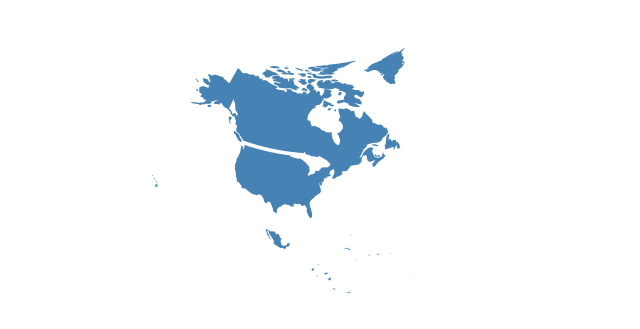

In [3]:
gplt.cartogram(
    df=world.query("continent == 'North America'")
    ,scale='area'
    ,projection=gcrs.AlbersEqualArea()
    ,figsize=(8,8))

Y se hace la comparación con otro indicador, por ejemplo: `pop_est`

<GeoAxes: >

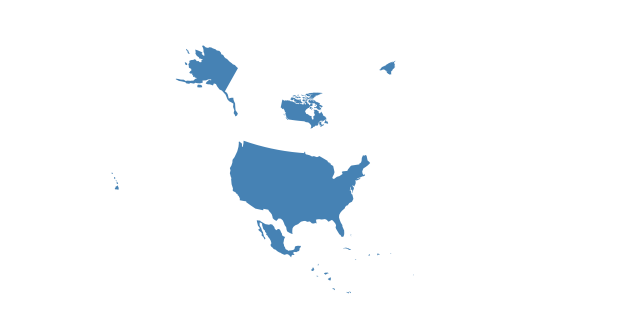

In [4]:
gplt.cartogram(
    df=world.query("continent == 'North America'")
    ,scale='pop_est'
    ,projection=gcrs.AlbersEqualArea()
    ,figsize=(8,8))

Nótese que hacer estos escalamientos en realidad son operaciones complejas, sin embargo, _Geoplot_ permite hacerlos de forma sencilla

---